<a href="https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2024/blob/main/session1/session1_p2.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

# Session 1: part 2
We will apply the knowledge from previous session to analyze a dataset of houses. This dataset is obtained from the Coursera machine learning foundations course (https://www.coursera.org/learn/ml-foundations/supplement/RP8te/predicting-house-prices-assignment), a highly recommended course. It can be downloaded at https://d396qusza40orc.cloudfront.net/phoenixassets/home_data.csv.

__Exercises__: Just follow along this notebook and fill in the elements with '_'. You are also invited to play with the code, discuss with your colleagues and ask questions to the instructors.

First we load the data and import the libraries we will use.

In [1]:
# ipython enable print each statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load home_data.csv into a dataframe
homes = pd.read_csv('home_data.csv')
homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can see that we have 21 features and 21613 samples.

In [3]:
homes.shape

(21613, 21)

# Data analysis

Now that we have the data loaded, we can start exploring it. 

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Price')

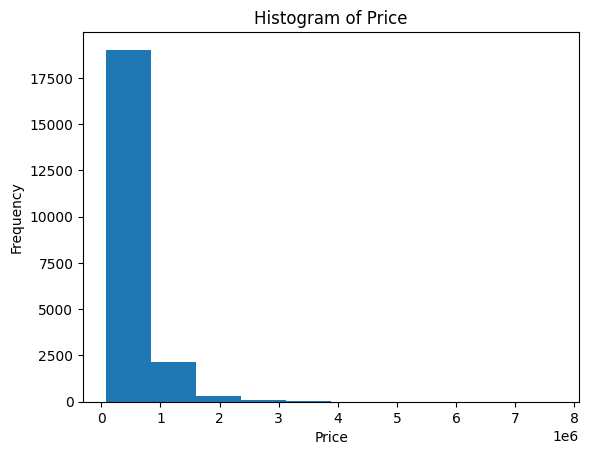

In [4]:
# Plot a histogram of price
plt.hist(homes['price']) # TODO solution remove
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

Text(0.5, 0, 'Living Area (sqft)')

Text(0, 0.5, 'Price ($)')

Text(0.5, 1.0, 'Price vs Living Area')

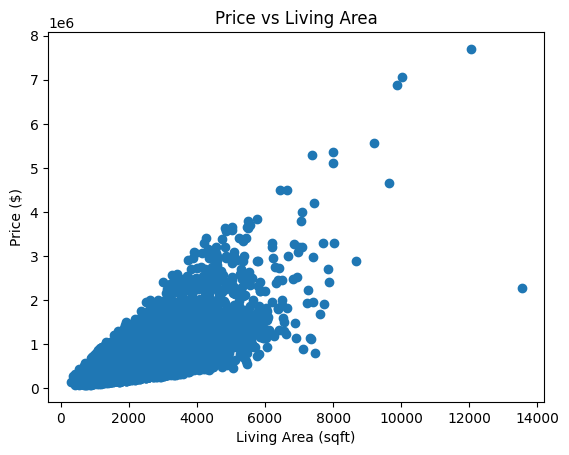

In [5]:
import matplotlib.pyplot as plt

# Plot square feet vs price of house
plt.scatter(homes['sqft_living'], homes['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.title('Price vs Living Area')
#plt.scatter(_, homes['price'])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Price ($)')

Text(0.5, 1.0, 'Price vs Feature')

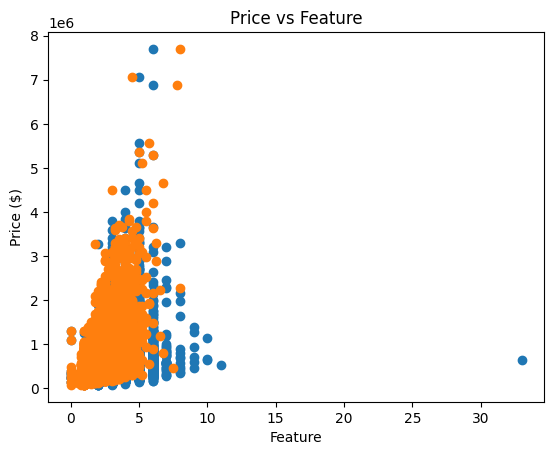

In [6]:
# Also plot bedrooms and bathrooms vs price
# TODO Find out how to add a legend
plt.scatter(homes['bedrooms'], homes['price'], label='Bedrooms')
plt.scatter(homes['bathrooms'], homes['price'], label='Bathrooms')
plt.xlabel('Feature')
plt.ylabel('Price ($)')
plt.title('Price vs Feature')
#plt.legend()

#plt.scatter(_, homes['price'])
#plt.scatter(_, homes['price'])

In [7]:
# Exercise. generate summaries of the data for all columns except id 
# is there a pandas API that seems helpful? 
# Check the docs at https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

#homes.describe()

In [8]:
# Exercise. Find the most expensive house and the biggest house

# find the most expensive house
#homes[homes['price'] == homes['price'].max()]

# find the biggest house
#homes[homes['sqft_living'] == homes['sqft_living'].max()]

In [9]:
# Exercise. Find the average price, the median price, and the average price of a 3 bedroom house

# average home price
homes['price'].mean()
# median home price
homes['price'].median()
#homes['price']._()
# average home price for houses with 3 bedrooms
homes[homes['bedrooms'] == 3]['price'].mean()

540088.1419053348

450000.0

466232.07949918567

# Linear regression

We will now use a linear regression model to predict the housing prices. As in the typical machine learning workflow, we perform the following steps:
1. Split the data into training and test sets
2. Train the model on the training set
3. Evaluate the model on the test set

We will use the scikit-learn library to perform the linear regression. Scikit-learn is a very popular library for machine learning in Python. It provides a wide range of machine learning algorithms and tools for data analysis and visualization. It is also very well documented, so it is a good idea to get familiar with it.

In [10]:
from sklearn.model_selection import train_test_split

# set seed for reproducibility
np.random.seed(0)
train_homes, test_homes = train_test_split(homes, test_size=0.2)

In [11]:
# we can check the size of the train and test sets
train_homes.shape
test_homes.shape

(17290, 21)

(4323, 21)

In [12]:
# build linear regression model from sqft_living to price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# fit the model
sqft_model = LinearRegression()
sqft_model.fit(train_homes[['sqft_living']], train_homes['price'])

# make predictions on the test data
pred_homes = sqft_model.predict(test_homes[['sqft_living']])
pred_homes.shape

LinearRegression()

(4323,)

In [13]:
# Now we can analyze the model performance.

# The coefficients
print("Coefficients:", sqft_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" %  np.sqrt(mean_squared_error(test_homes['price'], pred_homes)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_homes['price'], pred_homes))

Coefficients: [283.96855737]
Mean squared error: 248879.06
Coefficient of determination: 0.48


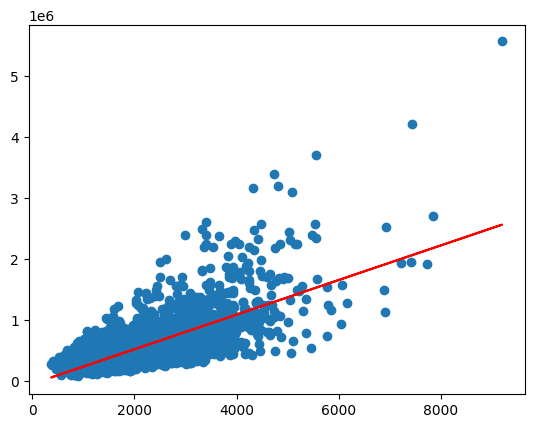

In [14]:
# plot the predictions and the original data
plt.scatter(test_homes['sqft_living'], test_homes['price'])
plt.plot(test_homes['sqft_living'], pred_homes, color='red')

We achieve a relatively satisfactory result. Let's see how we can improve it. Perhaps we can use more features? 

In [15]:
# perform the linear regression with more features 
# ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
# and compare the results

# fit the model
multi_model = LinearRegression()
multi_model.fit(
    train_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'long', 'zipcode']], 
    train_homes['price'])

# make predictions on the test data
#multi_pred_homes = multi_model.predict(
#    test_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']])
multi_pred_homes = multi_model.predict(
    test_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'long', 'zipcode']])

# The coefficients
print("Coefficients:", multi_model.coef_)
# The root mean squared error
print("Root mean squared error: %.2f" % 
      np.sqrt(mean_squared_error(test_homes['price'], multi_pred_homes)))
#print("Root mean squared error: %.2f" % _)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_homes['price'], multi_pred_homes))
#print("Coefficient of determination: %.2f" % _)

print("Mean squared error: %.2f" % mean_squared_error(test_homes['price'], multi_pred_homes))

LinearRegression()

Coefficients: [-5.83133901e+04  1.29612134e+04  3.26055099e+02 -8.43692974e-02
  3.50179065e+03 -4.18683001e+05  3.68630484e+01]
Root mean squared error: 240518.69
Coefficient of determination: 0.51
Mean squared error: 57849242326.17


__Discuss__: 
1. What is the difference between the training and test sets? Why do we need both?
2. Why is the `multi_model` performing better than the original `sqft_model`?


# Linear Regression with Pytorch

Now we will use the same dataset to perform linear regression using PyTorch. We will use the same features as before, but we will use a different model. Instead of using a linear model, we will use a neural network with no hidden layer. 

Do not try to understand all the details of the code below. The important thing is to understand the general structure of the code and the main steps of the training process:
1. Load the data
2. Define the model, the loss function and the optimizer. These concepts will be introduced in more details in the next session. For now, just think of the model as a function that takes the input and returns the output. The loss function is a function that measures how good the model is. The optimizer is an algorithm that tries to minimize the loss function.
5. Train the model for a number of epochs. Train consists of using the loss function to measure the error of the model and the optimizer to update the parameters of the model to reduce the error.
6. Evaluate the model. Reuse the loss function to measure the error of the model on the test set.



In [56]:
InteractiveShell.ast_node_interactivity = "last_expr"

# Load the data
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

data = homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']]
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(data), dtype=torch.float32)
y = torch.tensor(homes['price'].values.reshape(-1, 1), dtype=torch.float32)

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [61]:
# define the model 
model = nn.Linear(X.shape[1], y.shape[1])

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01) # optimization

In [65]:
# The training loop
n_epochs = 100 # number of epochs to run
train_loss = []
for epoch in range(n_epochs):
    model.train() # set model to training mode
    # forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    # update weights
    optimizer.step()
    # save loss for plotting
    train_loss.append(loss.item())

In [66]:
# The test loop
model.eval() # set model to evaluation mode
y_pred = model(X_test)
loss = loss_fn(y_pred, y_test)
print("Root mean squared error: %.2f" % np.sqrt(loss.item()))
print("r2_score: %.2f" % r2_score(y_test.detach().numpy(), y_pred.detach().numpy()))

Root mean squared error: 259547.99
r2_score: 0.52


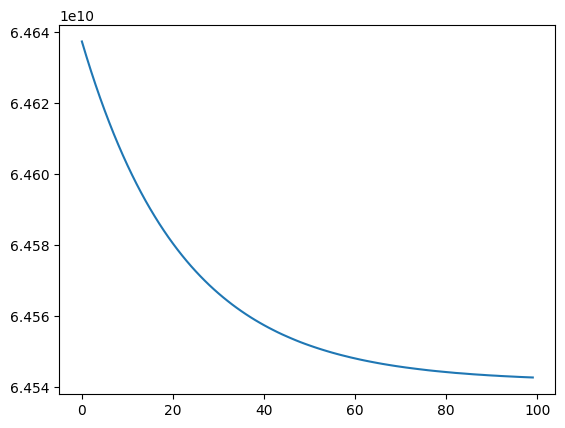

In [67]:
# plot the train loss
plt.plot(train_loss)

Note that we are able to achieve very similar results using PyTorch. It turns out that a one layer neural network is equivalent to a linear regression model. You can read more about this on https://deeplearning.neuromatch.io/tutorials/W1D2_LinearDeepLearning/student/W1D2_Tutorial3.html#bonus (see Bonus section).